# Anomaly Detection

## What is Anomaly Detection?

Imagine you have an online store. Usually, you sell about 50 T-shirts a day. But one day, you sell 500! That's strange and could be a sign of something wrong, like a glitch in your website or even fraud. To figure out what's going on, you can use anomaly detection.

Anomaly detection is like a "weirdness detector". It helps you find things in your data that don't follow the usual pattern. It's useful in many areas, like spotting fraud, finding sick patients in healthcare, or predicting when a machine might break down.

The key to anomaly detection is figuring out what's "normal" and what's "weird". You teach a model what's normal, and then it can spot the weird things. There are many ways to do this, and the best way depends on your data and what you're trying to find.

### Solving the Case with Anomaly Detection

Let's say we have a data set that when we plot the graph, it's clustered around a single group. In this case we have a data set of Sales Activity with two features, `Price of sales` and `Time of sales`. For Time of sales we do some scaling, so it falls in a similar range to Price.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

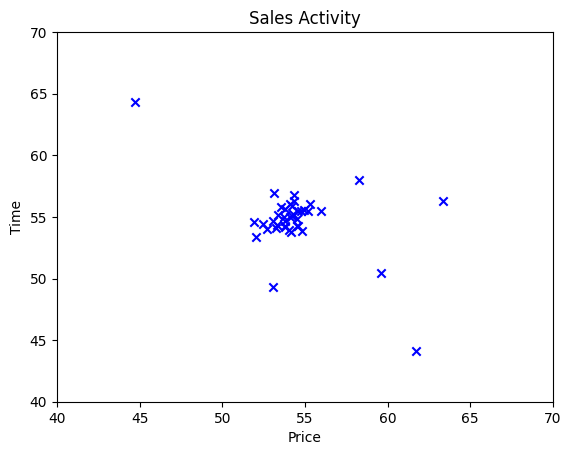

In [ ]:
# Training data, used to fit a Gaussian distribution
X_train = np.array( [[53.81548, 54.17169],
 [54.31098, 56.25419],
 [53.53597, 55.77020],
 [54.80103, 53.81813],
 [53.77274, 54.64955],
 [53.76510, 55.02311],
 [54.05349, 53.93946],
 [55.30905, 56.04190],
 [53.15523, 56.92122],
 [52.69940, 53.99916],
 [54.36799, 56.75782],
 [53.26325, 54.09898],
 [51.91253, 54.61325],
 [53.37000, 55.18268],
 [54.15764, 53.77083],
 [55.99450, 55.45329],
 [54.96982, 55.59222],
 [54.75068, 55.46889],
 [53.33027, 54.34699],
 [53.05002, 54.68726],
 [53.77642, 54.23618],
 [55.17426, 55.50957],
 [54.21251, 55.08270],
 [53.82089, 55.61146],
 [54.12355, 54.95509],
 [54.54752, 54.85861],
 [54.09944, 56.03131],
 [54.57730, 54.25667],
 [54.52331, 54.23004],
 [54.30044, 55.26643],
 [54.55839, 55.48691],
 [54.22494, 55.86117],
 [52.04029, 53.34483],
 [53.07931, 49.34787],
 [61.72713, 44.12623],
 [52.47662, 54.45936],
 [59.58257, 50.41161],
 [63.33986, 56.29887],
 [58.26118, 57.97830],
 [44.75261, 64.35040]])

# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')

# Set the title
plt.title("Sales Activity")
# Set the y-axis label
plt.ylabel('Time')
# Set the x-axis label
plt.xlabel('Price')
# Set axis range
plt.axis([40, 70, 40, 70])
plt.show()

In [ ]:
X_train

array([[53.81548, 54.17169],
       [54.31098, 56.25419],
       [53.53597, 55.7702 ],
       [54.80103, 53.81813],
       [53.77274, 54.64955],
       [53.7651 , 55.02311],
       [54.05349, 53.93946],
       [55.30905, 56.0419 ],
       [53.15523, 56.92122],
       [52.6994 , 53.99916],
       [54.36799, 56.75782],
       [53.26325, 54.09898],
       [51.91253, 54.61325],
       [53.37   , 55.18268],
       [54.15764, 53.77083],
       [55.9945 , 55.45329],
       [54.96982, 55.59222],
       [54.75068, 55.46889],
       [53.33027, 54.34699],
       [53.05002, 54.68726],
       [53.77642, 54.23618],
       [55.17426, 55.50957],
       [54.21251, 55.0827 ],
       [53.82089, 55.61146],
       [54.12355, 54.95509],
       [54.54752, 54.85861],
       [54.09944, 56.03131],
       [54.5773 , 54.25667],
       [54.52331, 54.23004],
       [54.30044, 55.26643],
       [54.55839, 55.48691],
       [54.22494, 55.86117],
       [52.04029, 53.34483],
       [53.07931, 49.34787],
       [61.727

From a human perspective, it's easy to see that there is a single group of data points. However there are also data points that are quite far away from the group. Those data points that are far away from the group is considered an anomaly. The same as the concept of outliers in statistics. In anomaly detection, the job of the model is to identify those outliers.

How can we do that ?

When we think of "normal", "outliers" and "statistics", one thing comes to mind. **Gaussian distribution!**

Using the Gaussian distribution, we can say that the majority of the data will be close to the center of the bell curve or the mean. A minority of data will be either on the far left or far right. We can set a treshold at the far left or far right of the curve and declare anything outside that treshold as "anomaly".

In the case above, we can see that the data is centered on a single cluster with outliers around it. Which is a good fit for using Gaussian Distribution.

![bell-curve](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/bell-curve-min.png)

### Gaussian (Normal) Distribution Recap

The Gaussian distribution is characterized by two parameters: the mean (μ) and the standard deviation (σ).

- The **mean** ($\mu$) is the average value. In our case, this is average value for `Price`.  The formula is:
  $$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

- The **standard deviation** ($\sigma$) is a measure of the amount of variation or dispersion in the set of values. A low standard deviation means that the values tend to be close to the mean, while a high standard deviation means that the values are spread out over a wider range. The formula is:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

The usual Gaussian Distribution bell curve we see will map a single feature which we'll plot on x-axis while the y-axis will be the either the `frequency` or `density` of data points at each value on the x-axis.

- `Frequency` is where each bar's height corresponds to the number of data points that fall within that bin's range. The y-axis shows counts (number of observations).
- `Density` is where each bar's height corresponds to the number of data points within the bin, normalized such that the total area under the histogram is 1. The y-axis shows density (number of observations per unit of the variable on the x-axis).

Because we have two features in our data set, it's best so use `Density` because it's a normalized version of the data, retaining the shape but making sure the range remains between 0 and 1.

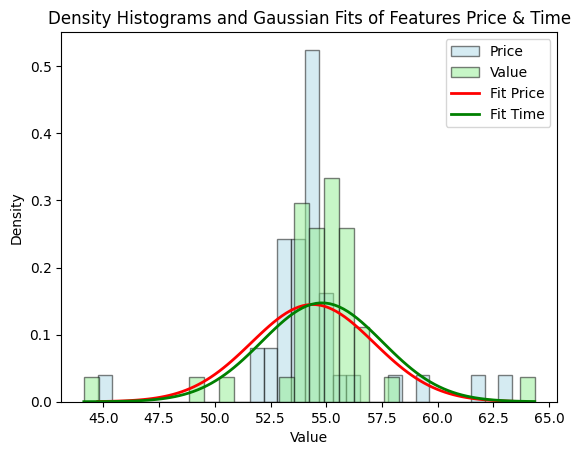

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Select the first and second features from your data
feature1 = X_train[:, 0]
feature2 = X_train[:, 1]

# Plotting the histograms with density=True
plt.hist(feature1, bins=30, density=True, color='lightblue', edgecolor='black', alpha=0.5, label='Price')
plt.hist(feature2, bins=30, density=True, color='lightgreen', edgecolor='black', alpha=0.5, label='Value')

# Fit Gaussian curves to the data
mean_feature1, std_feature1 = np.mean(feature1), np.std(feature1)
mean_feature2, std_feature2 = np.mean(feature2), np.std(feature2)

x_feature1 = np.linspace(min(feature1), max(feature1), 100)
x_feature2 = np.linspace(min(feature2), max(feature2), 100)

fit_feature1 = norm.pdf(x_feature1, mean_feature1, std_feature1)
fit_feature2 = norm.pdf(x_feature2, mean_feature2, std_feature2)

# Plot Gaussian curves
plt.plot(x_feature1, fit_feature1, 'r-', linewidth=2, label='Fit Price')
plt.plot(x_feature2, fit_feature2, 'g-', linewidth=2, label='Fit Time')

plt.title('Density Histograms and Gaussian Fits of Features Price & Time')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


As you can see, the bell curves between features are quite similar using `Density` which makes it easier for use to find the treshold, compared to the histogram using `Frequency`.

The formula for calculating the Density is commonly known as PDF (Probability Density Function) and because it maps any points in x to the bell curve, we can use it to find $p(x)$ given $\mu$ and $\sigma$. The formula is

$$ p(x ; \mu,\sigma ^2) = f(x) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

Where:

- $x$ is an individual data point in the distribution,
- $\mu$ or 'mu' is the mean or center of the distribution,
- $\sigma^2$ or 'sigma-squared' is the variance, which is the square of the standard deviation (which represents the distribution of data around the mean),
- $\pi$ is the constant number Pi, and
- $exp$ is an exponential function.

So, $p(x)$ essentially gives us the 'height' of the data point on the normal distribution curve, or in other words, the probability of that data point in the data we have.

> Note: We won't go too deep into the Math behind PDF because it's quite complex.

While it's easy to interpret the overlapping bell curve, sometimes the data may not fit nicely like this. The best way to visualize two features or more is using a contour plot. Let's see what it looks like:

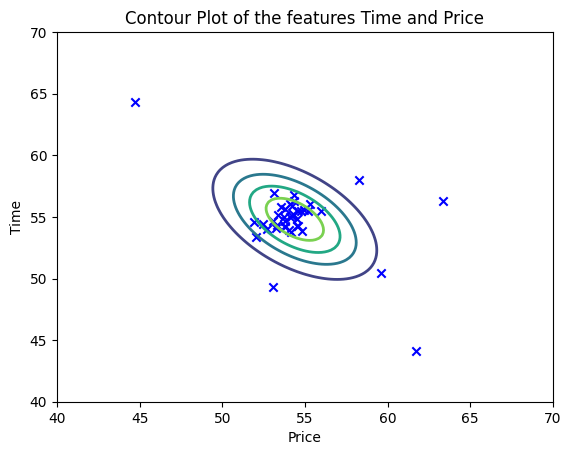

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Select the first and second features from your data
feature1 = X_train[:, 0]
feature2 = X_train[:, 1]

# Fit a 2D Gaussian to the data
mean = [np.mean(feature1), np.mean(feature2)]
covariance = np.cov(feature1, feature2)
gaussian = multivariate_normal(mean=mean, cov=covariance)

# Create a scatter plot of the data
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')

# Create a grid of values
x, y = np.meshgrid(np.linspace(min(feature1), max(feature1), 100), np.linspace(min(feature2), max(feature2), 100))
pos = np.dstack((x, y))

# Plot Gaussian contour lines
plt.contour(x, y, gaussian.pdf(pos), levels=5, linewidths=2, cmap='viridis')

# Set the title
plt.title("Contour Plot of the features Time and Price")
# Set the y-axis label
plt.ylabel('Time')
# Set the x-axis label
plt.xlabel('Price')
# Set axis range
plt.axis([40, 70, 40, 70])

plt.show()


It's a lot easier to see the outliers, isn't it ?

Now, let's build our own model and later on decide how to automatically find the outliers by setting the treshold.


### Anomaly Detection Algorithm using Gaussian Distribution

In general, the Anomaly Detection Algorithm using Gaussian Distribution involves the following steps:

1. **Gather and Preprocess Data**: Begin with gathering the data that you need. In our case, this would be sales data. Preprocessing steps could include data cleaning (removing duplicate entries, handling missing values, etc.), and feature selection (choosing which data categories are relevant for detecting anomalies). If data scales vary significantly, normalization or standardization techniques can be used to bring the data into comparable ranges.

2. **Estimate Parameters**: Next, we determine the parameters of the Gaussian distribution, specifically the mean ($\mu$) and variance ($\sigma^2$) for each feature in our dataset. These parameters define our "normal" behaviour.

3. **Calculate Probability Density**:  For a given sample $x$ in our dataset, we can calculate the probability density function ($p(x)$) using the mean and variance we've calculated. This will give us a probability of seeing such a sample in a normal scenario.

4. **Set Threshold**: Set a threshold $\epsilon$ (epsilon), which is the cut-off point for identifying an anomaly. Any data point with a probability density less than $\epsilon$ would be considered an anomaly.

5. **Flag Anomalies**: Apply the model to new, unseen data. For each new data point, calculate the Gaussian probability density. If the probability is under the threshold $\epsilon$, flag it as an anomaly.

### Applying the Gaussian (Normal) Distribution to Anomaly Detection

Again, here's our data:

| Price ($x1$) | Time ($x2$) |
|:------------:|:-----------:|
| 53.81548  | 54.17169 |
| 54.31098  | 56.25419 |
| 53.53597  | 55.77020 |
| 54.80103  | 53.81813 |
| 53.77274  | 54.64955 |
| ...  | ... |
| 44.75261   | 64.35040 |

This table represents the `X_train` data, where each row corresponds to a sale.
- The `Price (x1)` column represents the price of each sale.
- The `Time (x2)` column represents the time of each sale, which is a normalized/scaled timestamp data for each sale.

**Case Study: Unusual Sales Activity in an E-commerce Store**

Imagine we're running an online store that sells a variety of products. We have a steady stream of sales, with some predictable fluctuations based on the time of day and the price of the product.

However, one day we notice a few sales that seem unusual: they're for a high price and they're happening at odd times.
We wonder: could these be signs of fraudulent activity?

To investigate this, we decided to use anomaly detection. We gather our sales data and preprocess it, and then we fit a Gaussian distribution to our training data (`X_train`). We then use our cross-validation data (`X_val`) and the corresponding labels (`y_val`) to select a threshold for determining whether a sale is normal or anomalous.

`X_train` is used to fit a Gaussian distribution. Each row in `X_train` represents a sale, with the first column being the price of the sale and the second column being the time of the sale.

Now let's check the implementation using the example data set we have.

#### Estimating parameters for a Gaussian distribution

To perform anomaly detection, we must first fit the model to the data distribution. Previously we already had a training set ($x(1)$ and $x(2)$), from which we wanted to estimate a Gaussian distribution for each feature $x_i$. However, before going into the estimation calculations of the Gaussian distribution, we first need to calculate the $\mu$ and $\sigma$ for each feature.

In this stage, we will use the `estimate_parameters` function below to calculate $\mu_i$ (the average of each feature in $X$) and $\sigma_i^2$ (the variance of each feature in $X$). We can estimate the parameters ( $\mu_i$ and $\sigma_i^2$ ), of the $i$-th feature using the following equation:
- mean:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

- variance:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [ ]:
def estimate_parameters(X):
    """
    Calculates mean and variance of all features
    in the dataset

    Args:
        X (ndarray): (m, n) Data matrix

    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape

    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)

    return mu, var

In [ ]:
# Estimate mean and variance of each feature
mu, var = estimate_parameters(X_train)

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [54.38959275 54.80661075]
Variance of each feature: [7.5778417  7.33594621]


#### Calculate Probability Density

Once we get the values of $\mu$ (`54.38959275` and `54.80661075`) and $\sigma^2$ (`7.5778417` and `7.33594621`), we can estimate a Gaussian distribution for each feature $x_i$ and visualize the contour of the corresponding Gaussian distribution. We can find the Gaussian distribution with the formula:

$$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

Where $\mu$ is the mean and $\sigma^2$ is the variance that we got in the previous stage. At this stage, we will use the `gaussian_distribution` function below to estimate the Gaussian distribution.

In [ ]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
def gaussian_distribution(X, mu, var):
    """
    Computes the probability
    density function of the examples X under the multivariate gaussian
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """

    k = len(mu)

    if var.ndim == 1:
        var = np.diag(var)

    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))

    return p

p = gaussian_distribution(X_train, mu, var)
print(p)

[2.03208380e-02 1.84975797e-02 1.90965393e-02 1.97490428e-02
 2.07819102e-02 2.07375027e-02 2.01290908e-02 1.81938816e-02
 1.42330415e-02 1.69105879e-02 1.64668530e-02 1.89733198e-02
 1.42032164e-02 1.97398355e-02 1.97706515e-02 1.75037734e-02
 2.00171922e-02 2.05399750e-02 1.95393413e-02 1.89442121e-02
 2.03663703e-02 1.98175010e-02 2.11916322e-02 1.99929462e-02
 2.12147794e-02 2.13071107e-02 1.91650287e-02 2.08620722e-02
 2.08433125e-02 2.10296965e-02 2.06444604e-02 1.97525842e-02
 1.28207252e-02 2.50087949e-03 2.57028912e-07 1.66297608e-02
 9.65609657e-04 9.28721377e-05 3.99969495e-03 9.37374199e-08]


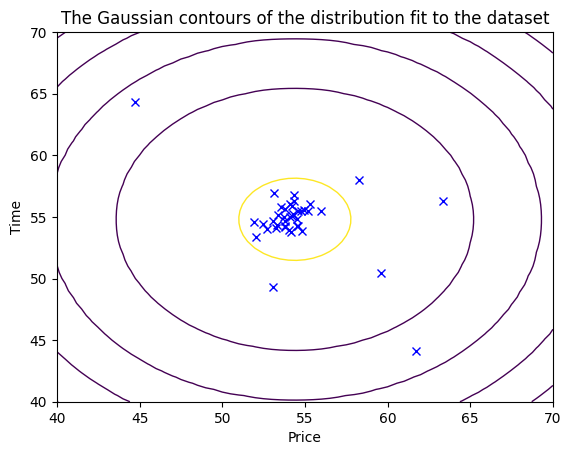

In [ ]:
#Plotting code
def visualize_data(X, mu, var):
    """
    This visualization shows you the
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """

    X1, X2 = np.meshgrid(np.arange(40, 70.5, 0.5), np.arange(40, 70.5, 0.5))
    Z = gaussian_distribution(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    Z = Z.reshape(X1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx')

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)

    # Set the title
    plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
    plt.ylabel('Time')
    # Set the x-axis label
    plt.xlabel('Price')

visualize_data(X_train, mu, var)

#### Setting the threshold

After the steps of Gaussian estimation and Probability Density calculation, we can proceed to examine which instances have a high or low probability according to this distribution.

Instances with low probability are likely to be anomalies within our data set.

The easiest way is to "eyeball" it, meaning we simply define the treshold manually where if $p(x)$ is less than a certain value, let's call it $\epsilon$, we'll declare it as an anomaly.

We can also set the treshold using the training data but it's not considered best practices because it risks overfitting. Overfitting happens when the model learns the training data so well that it performs poorly on unseen data.

The most common method for identifying these anomalous examples is to set a threshold originating from cross validation set. To do this we will use the 'set_threshold' function that will choose and return the threshold value of $ \epsilon $ using the $ f_1 $ score on the cross validation set.

>Note: Cross validation set comes from the split of the actual data into "training set" and "cross validation set".

For each data inside the cross validation set, we set the prediction whether it's normal or anomaly.

In [ ]:
# Cross-validation data
X_val = np.array([[53.65496, 53.97761], [55.59498, 55.04604], [53.77008, 55.37245], [56.22018, 54.39283], [53.55607, 53.83297], [54.71220, 55.16641], [54.27820, 55.55103], [53.22755, 53.69724], [53.17133, 53.04379], [55.22006, 55.70013], [53.08066, 54.47210], [53.68249, 54.24206], [52.77175, 54.87100], [54.86570, 55.49827], [55.14607, 56.29564], [53.03209, 54.37414], [56.30279, 54.08390], [53.71637, 56.42810], [53.77471, 53.43185], [55.06428, 55.40919], [52.31709, 54.07138], [54.22752, 55.52426], [54.68203, 54.84174], [54.21854, 54.60653], [54.38357, 55.40524], [54.74583, 56.98098], [53.76985, 53.51609], [54.02613, 54.18109], [52.71425, 54.42331], [54.22494, 56.28424], [54.29334, 55.99138], [54.95248, 54.36405], [54.73404, 55.81833], [59.28954, 50.67574], [48.73857, 56.79580], [40.30793, 45.39141], [68.54178, 61.59977], [59.03498, 52.02894], [54.37577, 63.35597], [48.77806, 56.68952]])

In [ ]:
# Labels for cross-validation data
y_val = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
 1, 1, 1])

# In this case in y_val:
# - 0 indicates a normal day of sales
# - 1 indicates an anomalous day.

`X_val` and `y_val` are used as cross-validation sets to select a threshold for determining whether a sale is normal or anomalous.
- `X_val` represents a sale, with the first column being the price of the sale and the second column being the time of the sale.
- `y_val` is a binary array where 1 represents an anomalous sale and 0 represents a normal sale.
- `X_val` and `y_val` values will be used as a cross-validation set
  $$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$$
- For each cross validation example, we will compute $p(x_{\rm cv}^{(i)})$. The vector of all of these probabilities $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv})})$ is passed to `set_threshold` in the vector `p_val`.

In [ ]:
# Display the shape of X_val
print ('The shape of X_val is:', X_val.shape)

# Display the shape of y_val
print ('The shape of y_val is: ', y_val.shape)

The shape of X_val is: (40, 2)
The shape of y_val is:  (40,)


The `set_threshold` function below we will use to find the best threshold for use to choose outliers based on the results of the validation set (`p_val`) and the basic truth (`y_val`). We will do a loop to try various $\epsilon$ values and select the best $\epsilon$ based on $F_1$ scores.

The $F_1$ score is the harmonic mean of precision and recall, a good F1 score means you have low false positives and low false negatives, so it is a good indication of the accuracy of your anomaly detection algorithm. We can calculate the F1 score by selecting `epsilon` as the threshold, and then we place the calculated value into `F1`. The $F_1$ score is computed using precision ($prec$) and recall ($rec$) as follows:
    $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$
        
Precision/Positive Predictive Value (PPV) is the proportion of true positive predictions among all positive predictions. We can calculate it with the formula:
    $$prec = \frac{tp}{tp+fp}$$

Meanwhile, Recall/Sensitivity/True Positive Rate (TPR) is the proportion of actual positives that are correctly identified. We can calculate it with the formula:
    $$rec = \frac{tp}{tp+fn}$$

where

- **True Positives (tp)**: The number of anomalies that were correctly identified as anomalies.

- **False Positives (fp)**: The number of normal data points that were incorrectly identified as anomalies (Type I error).

- **True Negatives (tn)**: The number of normal data points that were correctly identified as normal.

- **False Negatives (fn)**: The number of anomalies that were incorrectly identified as normal (Type II error).

The matrix is generally set out as follows:

|                        | Predicted: Normal | Predicted: Anomaly |
|:----------------------:|:-----------------:|:------------------:|
| **Actual: Normal**    |        TN         |        FP          |
| **Actual: Anomaly**   |        FN         |        TP          |


In [ ]:
def set_threshold(y_val, p_val):
    """
    Finds the best threshold to use for selecting outliers
    based on the results from a validation set (p_val)
    and the ground truth (y_val)

    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set

    Returns:
        epsilon (float): Threshold chosen
        F1 (float):      F1 score by choosing epsilon as threshold
        best_precision (float): Precision at best F1 score
        best_recall (float): Recall at best F1 score
    """

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    best_precision = 0
    best_recall = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):

        predictions = (p_val < epsilon)

        tp = np.sum((predictions == 1) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        fn = np.sum((predictions == 0) & (y_val == 1))

        # Check if the denominator of precision (tp + fp) is zero
        if tp + fp == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)

        # Similarly, check if the denominator of recall (tp + fn) is zero
        if tp + fn == 0:
            rec = 0
        else:
            rec = tp / (tp + fn)

        # Check if the denominator of F1 (prec + rec) is zero
        if prec + rec == 0:
            F1 = 0
        else:
            F1 = 2 * prec * rec / (prec + rec)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            best_precision = prec
            best_recall = rec

    return best_epsilon, best_F1, best_precision, best_recall

In [ ]:
p_val = gaussian_distribution(X_val, mu, var)
epsilon, F1, precision, recall = set_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)
print('Best Precision on Cross Validation Set: %f' % precision)
print('Best Recall on Cross Validation Set: %f' % recall)

Best epsilon found using cross-validation: 3.038309e-03
Best F1 on Cross Validation Set: 1.000000
Best Precision on Cross Validation Set: 1.000000
Best Recall on Cross Validation Set: 1.000000


#### Flag Anomalies
In the final stage, after we have succeeded in getting the best values for epsilon and F1, we can mark anomalous data. we can recall that if an example $x$ has a low probability $p(x) < \epsilon$, then the example is classified as an anomaly.

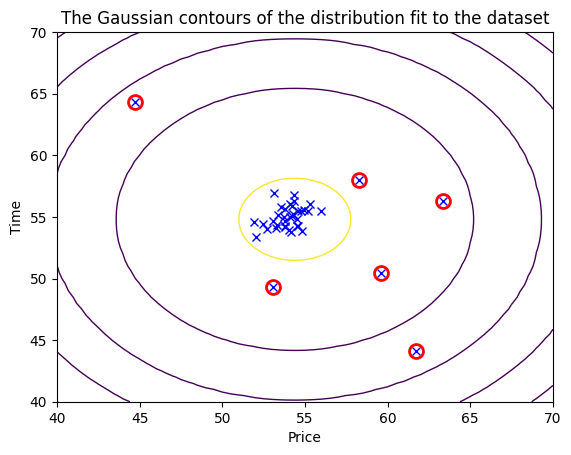

In [ ]:
epsilon = 0.01

# Find the outliers in the training set
outliers = p < epsilon

# Visualize the fit
visualize_data(X_train, mu, var)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)

And there we have it a complete Machine Learning model for anomaly detection using Gaussian Distribution.

## Use Cases of Anomaly Detection

Anomaly detection has a wide range of applications, including:

- **Fraud Detection**: Identifying unusual credit card transactions to prevent fraud.
- **Intrusion Detection**: Detecting unusual activity in a network that could indicate a cyber attack.
- **Healthcare**: Identifying unusual patient data that could indicate a medical problem.
- **Industrial Damage Detection**: Detecting unusual readings from sensors that could indicate equipment damage.

## Types of Anomalies

There are three main types of anomalies:

- **Point Anomalies**: A single data instance is anomalous if it's too far off from the rest. For example, usually spending 10 dollars for lunch, and suddenly spending 100 dollars.

- **Contextual Anomalies**: The abnormality is context-specific. This type of anomaly is common in time-series data. For example, someone is trying to copy large amount of data from a remote machine to a local host unexpectedly. While copying data from a remote machine to a local host may be normal, the large amount of data may indicate a potential cyber attak.

- **Collective Anomalies**: A set of data instances collectively helps in detecting anomalies. A single data point may look normal when looked in isolation, but when we look into a group of the datapoints, unexpected pattern may emerge. For example an irregular heartbeat may indicate a heart failure problem. When we look at an individual heartbeat it may look normal, when we look at a series of hearbeats we may notice that some heartbeats are missing. In this course, we will not explain this type of anomaly in more detail.

## Anomaly Detection Techniques

There are several techniques for anomaly detection, including:

- **Statistical Methods**: These methods model the normal data behaviour using statistical models and then use these models to detect anomalies.

- **Distance-Based Methods**: These methods calculate the distance between data points. Data points that are far away from others are considered anomalies.

- **Density-Based Methods**: These methods consider the density of data points. Areas of low density could be indicative of anomalies.

In this discussion, we used **Statistical Methods**. Where we fit a statistical model to the data and anomalies are identified as points where the model is a poor fit.

In this particular case, a Gaussian distribution is used to model our data. Basically, we model the data we have with the assumption that the data closely follows (fit) a normal distribution.